In [1]:
import sys
sys.path.insert(0, '..')
from definition import (
    branch,
    data_names,
#     limits_m_Kpipi,
    columns,
    latex_decay,
    colors
)

MC_name   = data_names['MC']
data_name = data_names['data']

# low = limits_m_Kpipi[data_type]['low']
# high = limits_m_Kpipi[data_type]['high']

print("branch: ", branch)

print("MC name: ", MC_name)
print("data name: ", data_name)

# print("low: ", low)
# print("high: ", high)


# used to change the name of the parameters in order to 
# be able to recreate zfit parameters with different names.
num = 0 


branch:  m_Kpipipi
MC name:  BTODstD0X_MC
data name:  BTODstD0X


In [2]:
num = 0

# $B \to D^{*-}\left(D^{0} \to K^- \pi^+ \pi^+ \pi^-  \right)X$ Background
1. Fit to $m(K^+ \pi^+ \pi^+)$ to isolate the $D^+$ peak in data
2. Computation of the $_s$Weights associated with the $D_s$ peak
3. Isolate the $D^+$ peak in MC with a $\pm 25$ MeV window around the $D^+$ peak 
4. Compare some $_s$Weighted data variables to their MC counterparts. For instance, look at the $q^2$, `isolation_BDT` and the angles.

After that, we might want want to reweight the the MC to match the data with `GBReweighter`

In [3]:
# python libraries
import zfit
import timeit
from numpy import sqrt

from hepstats.splot import compute_sweights

# bd2dsttaunu
from bd2dsttaunu.locations import loc
from bd2dsttaunu.definition import m_D0_PDG

# HEA library
from HEA.plot import plot_hist_auto, plot_hist, save_fig
from HEA.plot.fit import plot_hist_fit_auto
import HEA.fit.fit
from HEA import load_dataframe, load_dataframe_YY_MM
from HEA.plot.tools import draw_vline
from HEA.definition import latex_params
from HEA.fit import retrieve_params
from HEA.fit.fit import sum_crystalball_or_gaussian

Welcome to JupyROOT 6.22/06


## Read the  `data` sample

In [4]:
df = {}
df['MC']   = load_dataframe(loc.B2DstD0X_MC, tree_name='DecayTreeTuple/DecayTree', columns=[branch])
df['data'] = load_dataframe(loc.B2DstDplusX_list, tree_name='DecayTreeTuple/DecayTree', columns=[branch])


Loading /data/lhcb/users/scantlebury-smead/angular_analysis/double_charm/final_ds_selection_B_DstD0X_Kpipipi_truth_matched.root
Loading /data/lhcb/users/scantlebury-smead/angular_analysis/data/data_11_up_final_ds_selection.root
Loading /data/lhcb/users/scantlebury-smead/angular_analysis/data/data_12_up_final_ds_selection.root
Loading /data/lhcb/users/scantlebury-smead/angular_analysis/data/data_15_up_final_ds_selection.root
Loading /data/lhcb/users/scantlebury-smead/angular_analysis/data/data_16_up_final_ds_selection.root
Loading /data/lhcb/users/scantlebury-smead/angular_analysis/data/data_17_up_final_ds_selection.root
Loading /data/lhcb/users/scantlebury-smead/angular_analysis/data/data_18_up_final_ds_selection.root
Loading /data/lhcb/users/scantlebury-smead/angular_analysis/data/data_11_down_final_ds_selection.root
Loading /data/lhcb/users/scantlebury-smead/angular_analysis/data/data_12_down_final_ds_selection.root
Loading /data/lhcb/users/scantlebury-smead/angular_analysis/data/dat

In [5]:
# df['data'] = df['data'].dropna()
# df['MC'] = df['MC'].dropna()

## Plot

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


Figure saved in /home/correiaa/bd2dsttaunu/output/plots//BTODstD0X_vs_BTODstD0X_MC/m_Kpipipi_full


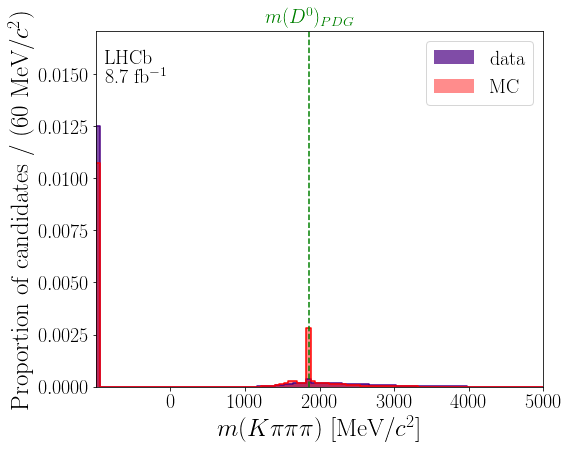

In [6]:
fig, ax = plot_hist_auto({'data': df['data'], 'MC': df['MC']}, 
                         branch,
                         folder_name=data_name, 
                         bar_mode=True, 
                         high=5000,
                         colors = [colors['data'], colors['MC']],
                         save_fig=False, alpha=[0.7, 0.45],
                         pos_text_LHC={'ha':'left', 'fontsize':20})

draw_vline(ax, m_D0_PDG, '$m(D^0)_{PDG}$', color='g', ls='--')

save_fig(fig, branch+'_full', folder_name=f"{data_name}_vs_{MC_name}")

Figure saved in /home/correiaa/bd2dsttaunu/output/plots//BTODstD0X_vs_BTODstD0X_MC/m_Kpipipi_full


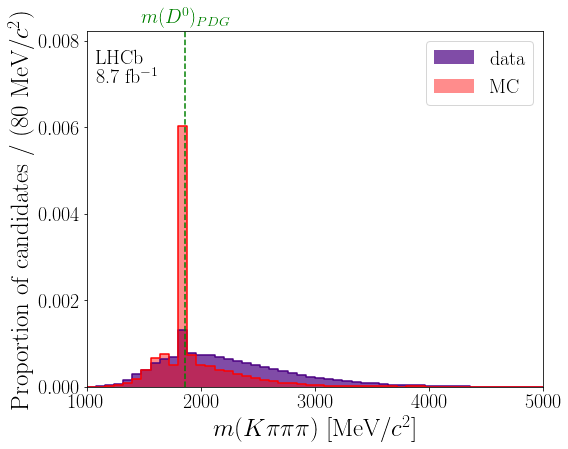

In [7]:
fig, ax = plot_hist_auto({'data': df['data'], 'MC': df['MC']}, 
                         branch,
                         folder_name=data_name, 
                         bar_mode=True, n_bins=50, 
                         low=1000, high=5000,
                         colors = [colors['data'], colors['MC']],
                         save_fig=False, alpha=[0.7, 0.45],
                         pos_text_LHC={'ha':'left', 'fontsize':20})

draw_vline(ax, m_D0_PDG, '$m(D^0)_{PDG}$', color='g', ls='--')

save_fig(fig, branch+'_full', folder_name=f"{data_name}_vs_{MC_name}")

In [16]:
mean = m_D0_PDG
low = m_D0_PDG - 150
high = m_D0_PDG + 150

Figure saved in /home/correiaa/bd2dsttaunu/output/plots//BTODstD0X_vs_BTODstD0X_MC/m_Kpipipi_full


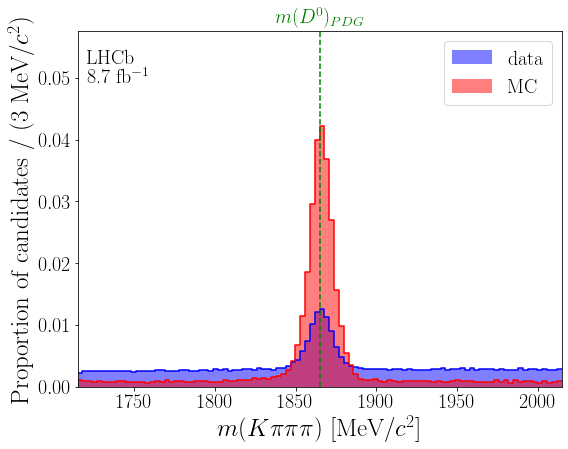

In [17]:
fig, ax = plot_hist_auto({'data': df['data'], 'MC': df['MC']}, 
                         branch,
                         folder_name=data_name, 
                         bar_mode=True, 
                         colors = ['blue', 'red'],
                         low=low, high=high,
                         save_fig=False,
                         pos_text_LHC={'ha':'left', 'fontsize':20})

draw_vline(ax, m_D0_PDG, '$m(D^0)_{PDG}$', color='g', ls='--')

save_fig(fig, branch+'_full', folder_name=f"{data_name}_vs_{MC_name}")

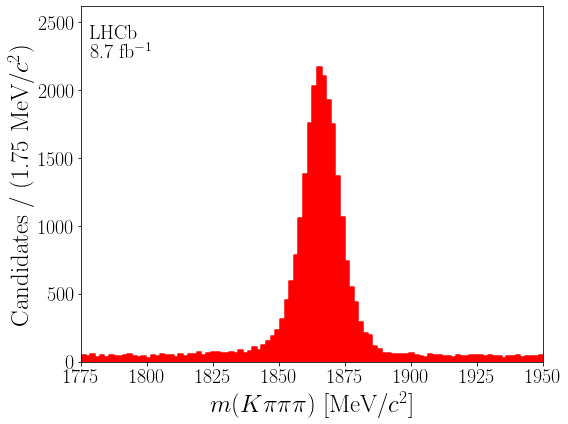

In [22]:
fig, ax = plot_hist_auto({'MC': df['MC']}, 
                         branch,
                         folder_name=data_name, 
                         bar_mode=True, 
                         colors = ['red'],
                         low=1775, high=1950,
                         save_fig=False,
                         pos_text_LHC={'ha':'left', 'fontsize':20})

Figure saved in /home/correiaa/bd2dsttaunu/output/plots//BTODstD0X_vs_BTODstD0X_MC/m_Kpipipi_full


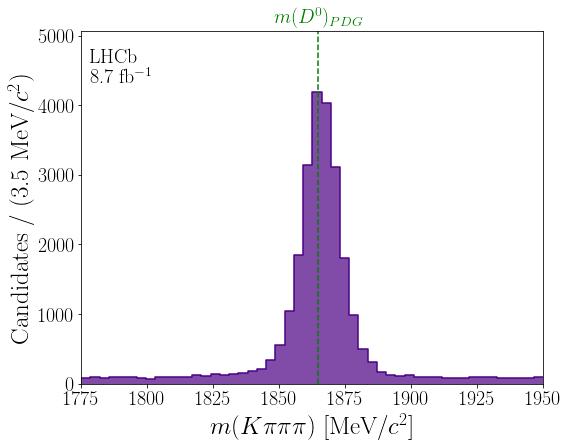

In [26]:
fig, ax = plot_hist_auto({'MC': df['MC']}, 
                         branch,
                         folder_name=data_name, 
                         bar_mode=True, n_bins=50, 
                         low=1775, high=1950,
                         colors = [colors['data'], colors['MC']],
                         save_fig=False, alpha=[0.7, 0.45],
                         pos_text_LHC={'ha':'left', 'fontsize':20})

draw_vline(ax, m_D0_PDG, '$m(D^0)_{PDG}$', color='g', ls='--')

save_fig(fig, branch+'_full', folder_name=f"{data_name}_vs_{MC_name}")